## **Student Performance Indicator**

#### **LifeCycle Of a ML project**


* Understanding the problem statemt 
* Data Collection 
* Data checks to perform 
* Exploratory Data Analysis
* Data Pre-processing
* Model Training
* Model Evaluation and Selection of Best Model


#### **1) Problem statement**
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
#### **2) Data Collection**
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

#### **Important Imports**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data

df=pd.read_csv(r'data\stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

#### **DataSet Information**

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

#### **Data Checks to Perform**

* Check missing value
* Check duplicates
* Check data type
* Check the number of unique values in each column
* Check statistics and distribution of data
* Check various categories present in the data

In [7]:
# Missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

*Statistical Inference:* Since there are no missing values luckily in the dataset, we don't need to go for **Imputation**

In [8]:
# Duplicates check

df.duplicated().sum()

np.int64(0)

*Statistical Inference:* Again fortunately there are no duplicates....else we would have to wisely **drop** the duplicate data 

In [9]:
# Check dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Check the number of unique values in each col.df

df.nunique() 

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
# Statistics of the data 

df.describe() # statistics of the int col.

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Statistical Inference:** 

* From the above description of numerical data it's clear that all the numeric column have almost similar mean
* All standard deviations are close - between 14.6 and 15.19 
* While there is a minimum score 0 for math, for writing minimum is much higher =10 and for reading is higher=17

#### **Exploring Data**



In [20]:
print("Categories available in Gender: ",df['gender'].unique(), end=" ")
print("\n")

print("Categories available in Gender: ",df['race_ethnicity'].unique(), end=" ")
print("\n")

print("Categories available in Gender: ",df['parental_level_of_education'].unique(), end=" ")
print("\n")

print("Categories available in Gender: ",df['lunch'].unique(), end=" ")
print("\n")

print("Categories available in Gender: ",df['test_preparation_course'].unique(), end=" ")
print("\n")

Categories available in Gender:  ['female' 'male'] 

Categories available in Gender:  ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories available in Gender:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories available in Gender:  ['standard' 'free/reduced'] 

Categories available in Gender:  ['none' 'completed'] 



In [25]:
# Finding and extracting all numerical and categorical features

num_features=[feature for feature in df.columns if df[feature].dtype=='int' or df[feature].dtype=='float']
cat_features=[feature for feature in df.columns if df[feature].dtype=='object']

In [29]:
print("Total Columns: ", df.shape[1]) #shape returns -> number of rows, cols...therefore shape[1] means columns
print("Numerical_Features: ",num_features)
print("Categorical_Features: ",cat_features)

Total Columns:  8
Numerical_Features:  ['math_score', 'reading_score', 'writing_score']
Categorical_Features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Based on this and our intuition we can infer that we may creeate 2 new column or a variable in the data called 'Total_score' and 'avg_score'

In [31]:
df['Total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg_score']=df["Total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### DATA Visualization

### Visualize average score distribution to draw some conclusions 

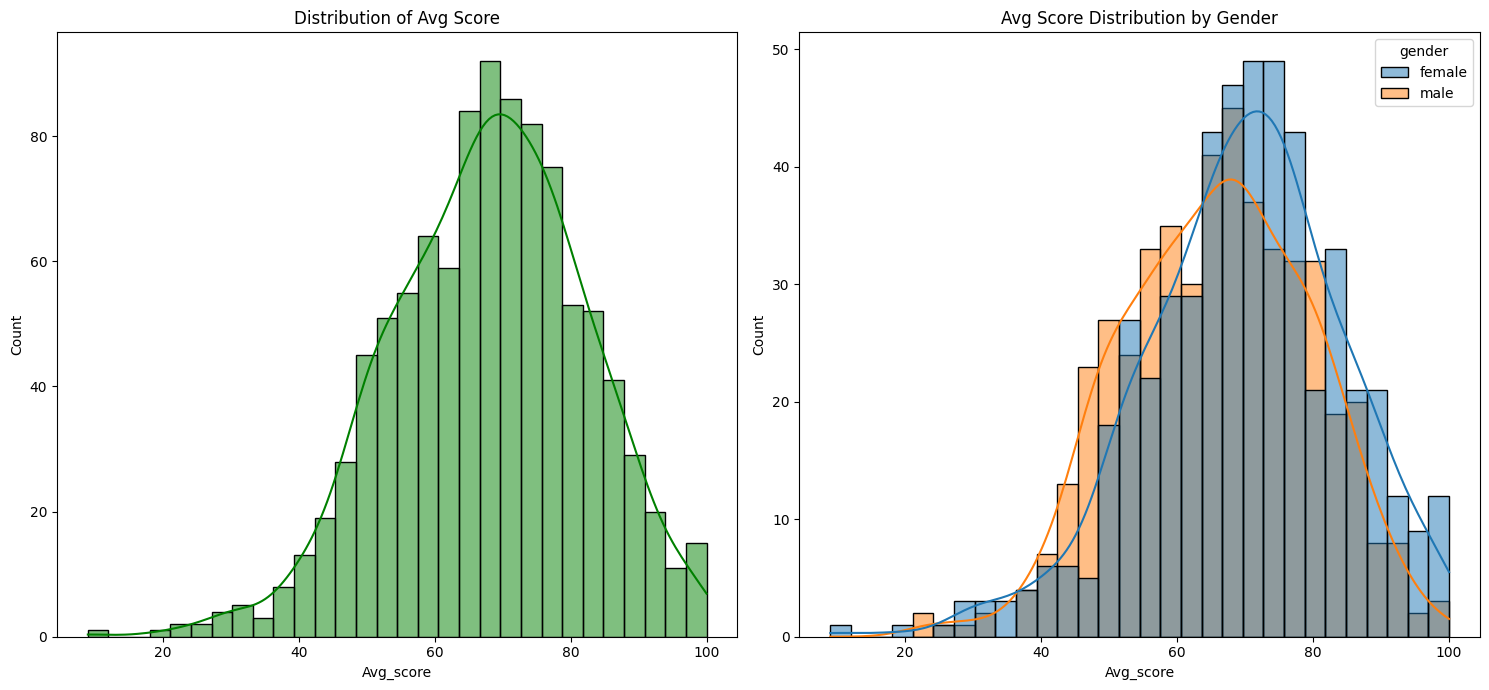

In [39]:
# Histogram , Kernel Distribution Function(KDE)

fig,axs=plt.subplots(1,2,figsize=(15,7)) # subplot return figure and axes..therefore draw a figure with a subplot thathas 1 row and 2 cols for 2 fig.

# ✅ Plot 1: Simple histogram
sns.histplot(
    data=df,
    x='Avg_score',
    bins=30,
    kde=True,
    color='g',
    ax=axs[0]
)
axs[0].set_title("Distribution of Avg Score")

# ✅ Plot 2: Histogram separated by gender
sns.histplot(
    data=df,
    x='Avg_score',
    bins=30,
    kde=True,
    hue='gender',   # ✅ Correct way to color by category
    ax=axs[1]
)
axs[1].set_title("Avg Score Distribution by Gender")

plt.tight_layout()
plt.show()

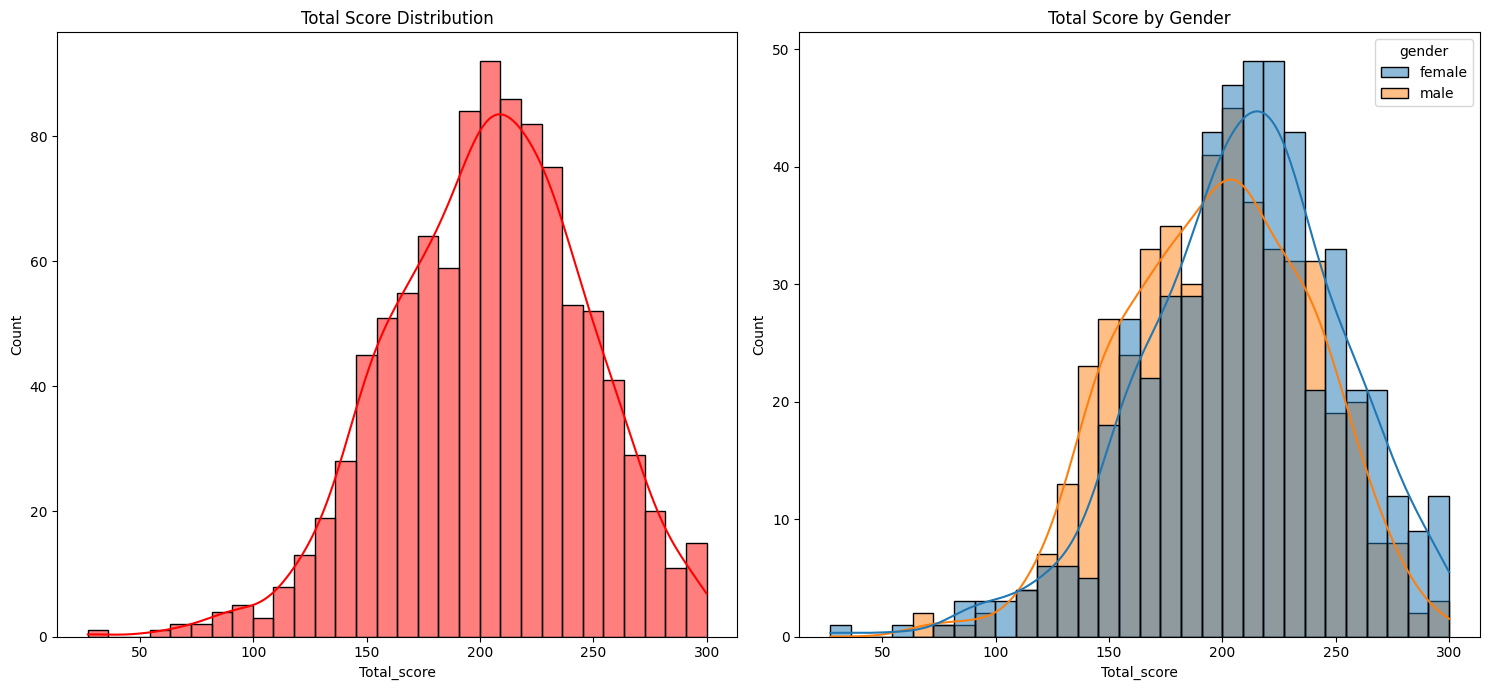

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# First plot
sns.histplot(df['Total_score'], bins=30, kde=True, color='red', ax=axes[0])
axes[0].set_title("Total Score Distribution")

# Second plot (colored by gender)
sns.histplot(data=df, x='Total_score', bins=30, kde=True, hue='gender', ax=axes[1])
axes[1].set_title("Total Score by Gender")

plt.tight_layout()
plt.show()


*Statistical Inference*: Female students tend to perform better than Male students

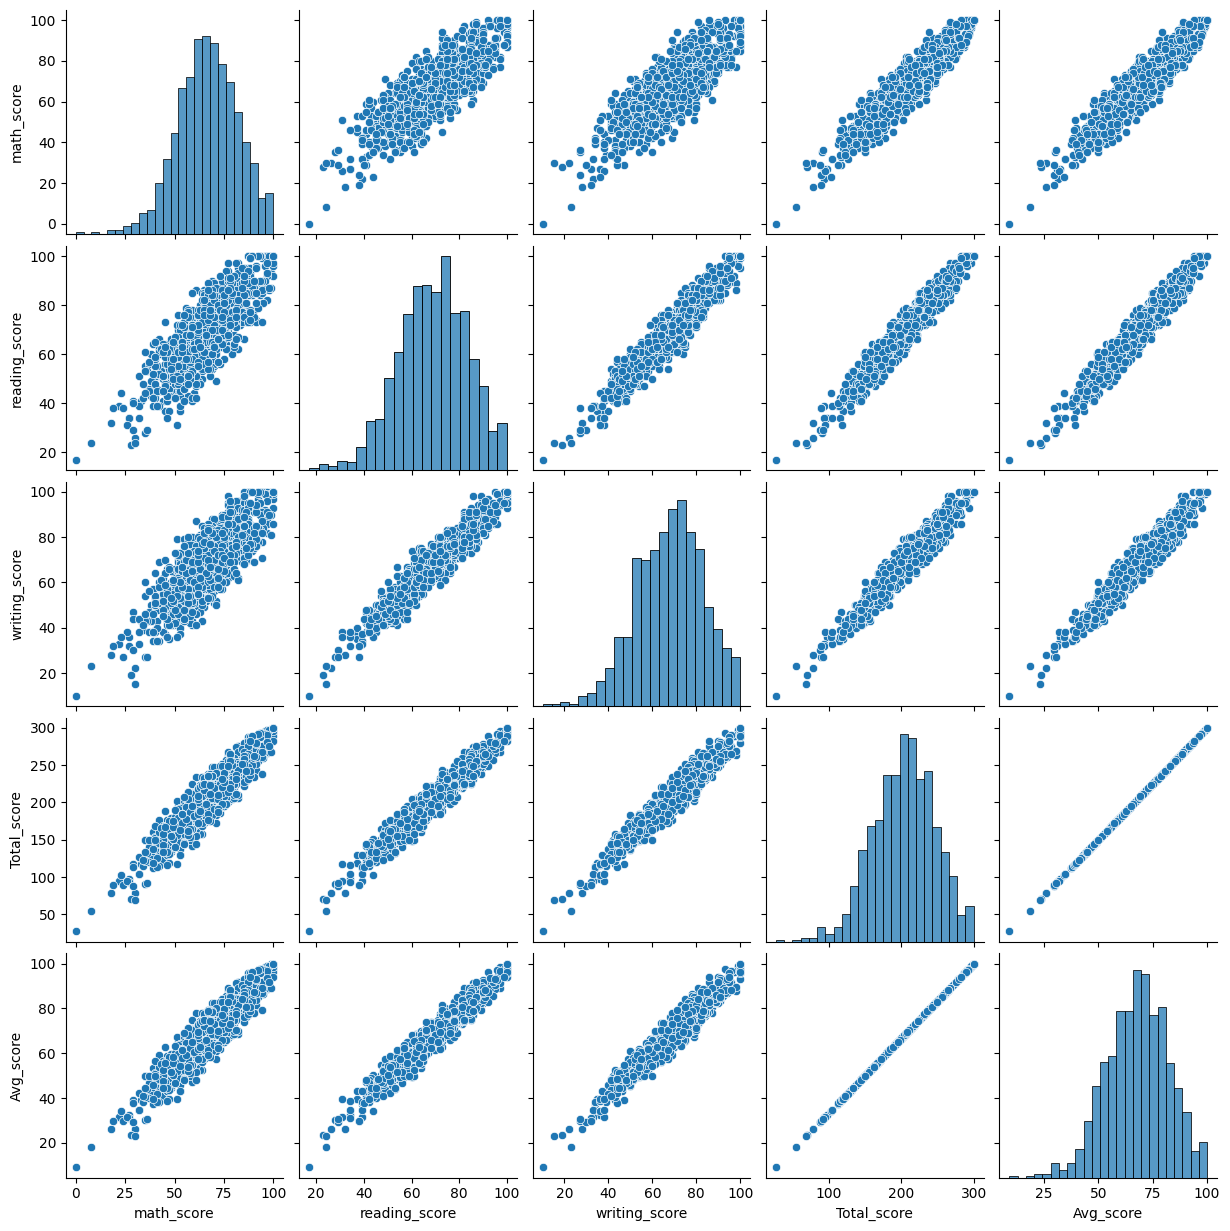

In [ ]:
sns.pairplot(df)

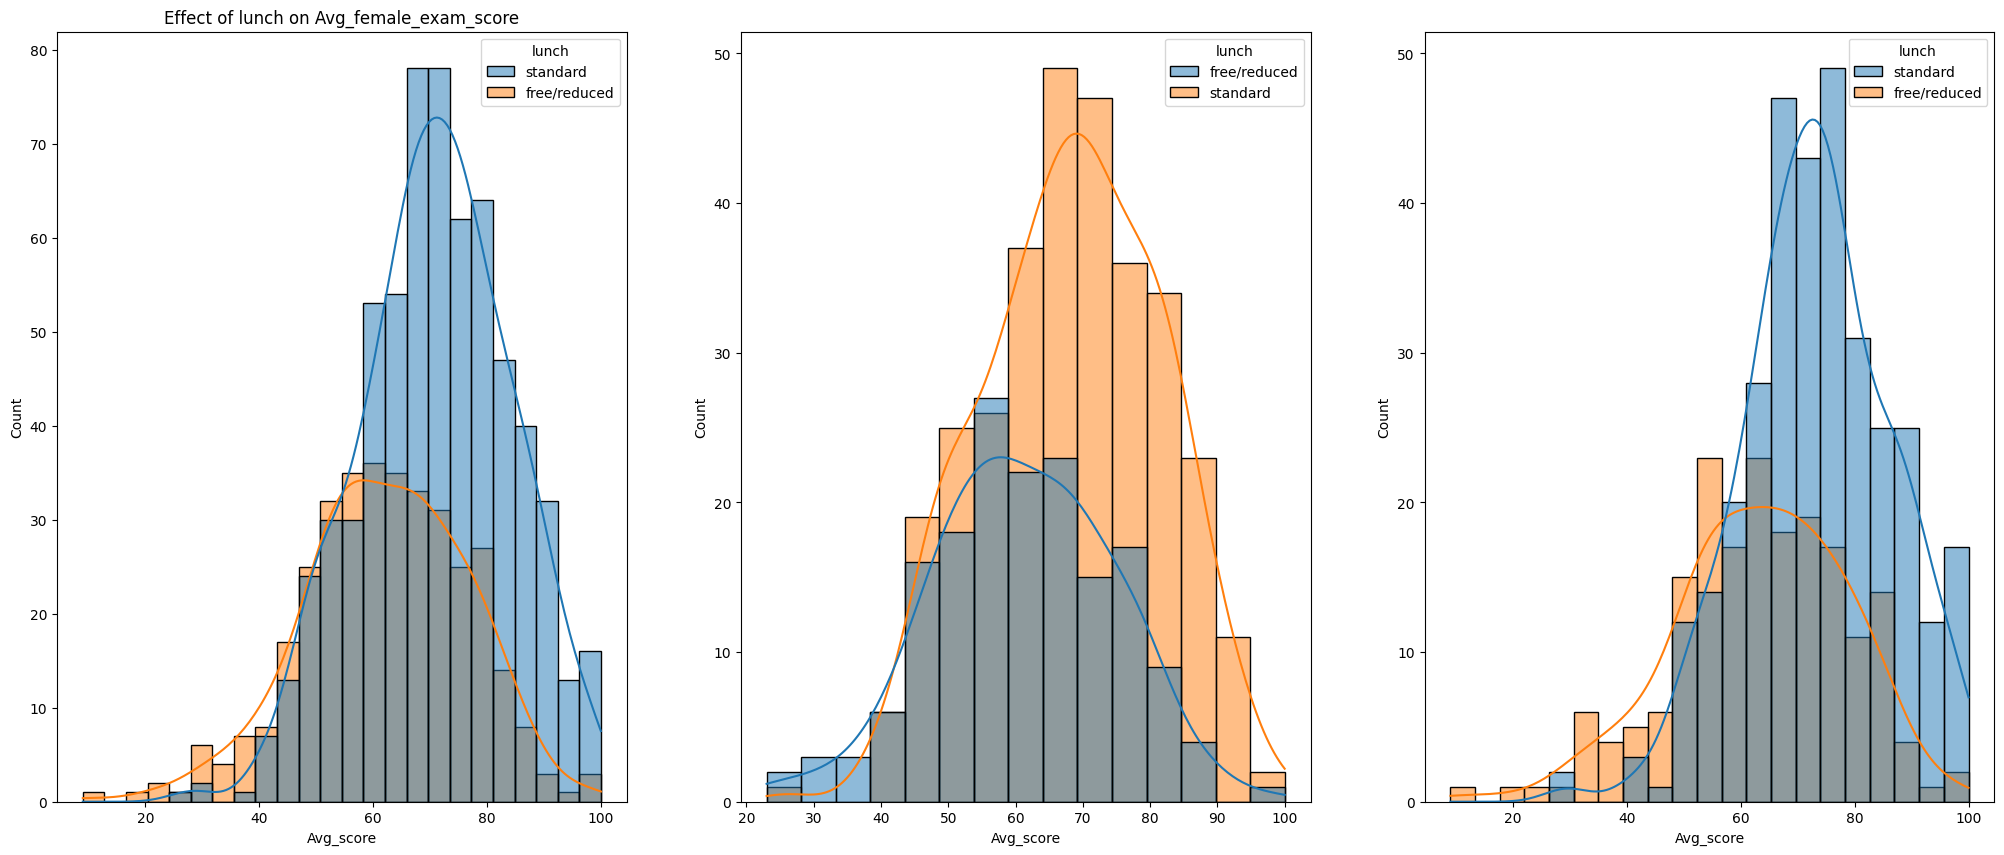

In [83]:
# Let's cehck how lunch - standard V/s free influences the performance on exam 

fig,axs=plt.subplots(1,3,figsize=(25,10))

# subplot01
sns.histplot(df,x='Avg_score',kde=True,color='b',hue='lunch',ax=axs[0])
axs[0].set_title("Effect of lunch on Avg_exam_score")

# subplot02
sns.histplot(df[df['gender']=='male'],x='Avg_score',kde=True,color='b',hue='lunch',ax=axs[1])
axs[0].set_title("Effect of lunch on Avg_male_exam_score")

# subplot03
sns.histplot(df[df['gender']=='female'],x='Avg_score',kde=True,color='bred',hue='lunch',ax=axs[2])
axs[0].set_title("Effect of lunch on Avg_female_exam_score")

plt.show()

*Statistical Inference*: 
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

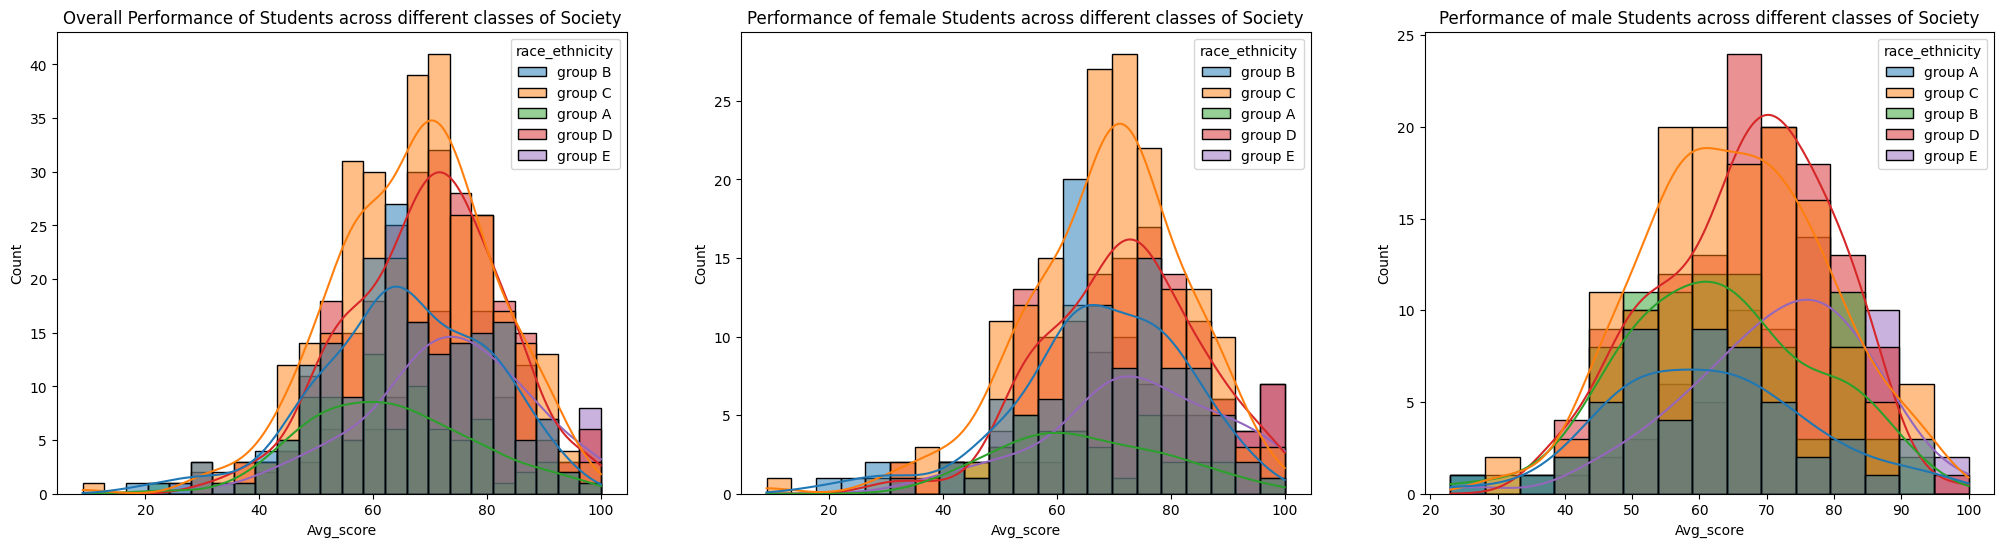

In [87]:
# Check the influence of class/race of Student 

fig,axs=plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df,x='Avg_score',kde=True,hue='race_ethnicity',ax=axs[0])
axs[0].set_title("Overall Performance of Students across different classes of Society")

sns.histplot(data=df[df.gender=='female'],x='Avg_score',kde=True,hue='race_ethnicity',ax=axs[1])
axs[1].set_title("Performance of female Students across different classes of Society")

sns.histplot(data=df[df.gender=='male'],x='Avg_score',kde=True,hue='race_ethnicity',ax=axs[2])
axs[2].set_title("Performance of male Students across different classes of Society")
plt.show()

*Statistical Inference:* 

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
* While average student from the other classes tends to perform better

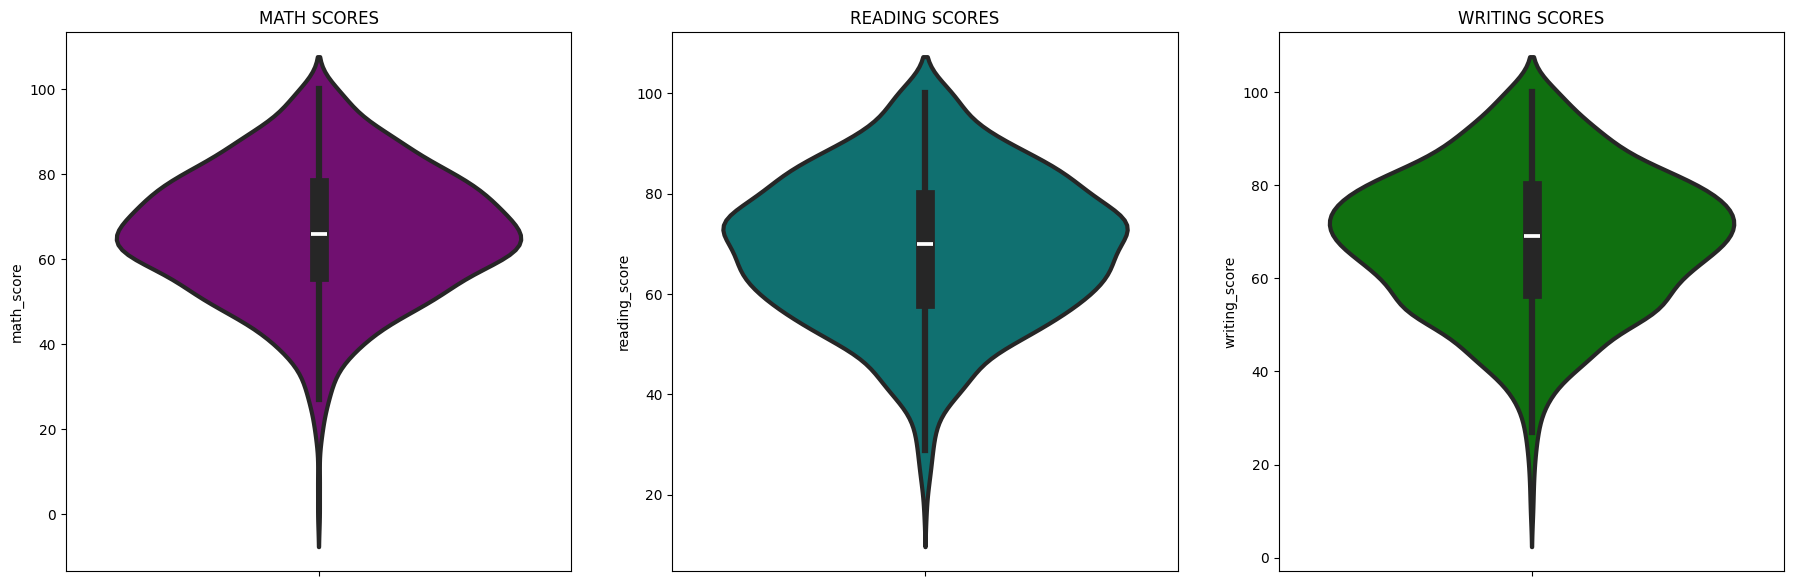

In [99]:
# Maximum score of students in all 3 subjects

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='purple',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='teal',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='green',linewidth=3)
plt.show()

*Statistical Inference*:

From the above three plots its clearly visible that most of the students score close to 60 in Maths whereas in reading and writing most of them score from 65-80

### Multivariate analysis using pieplot

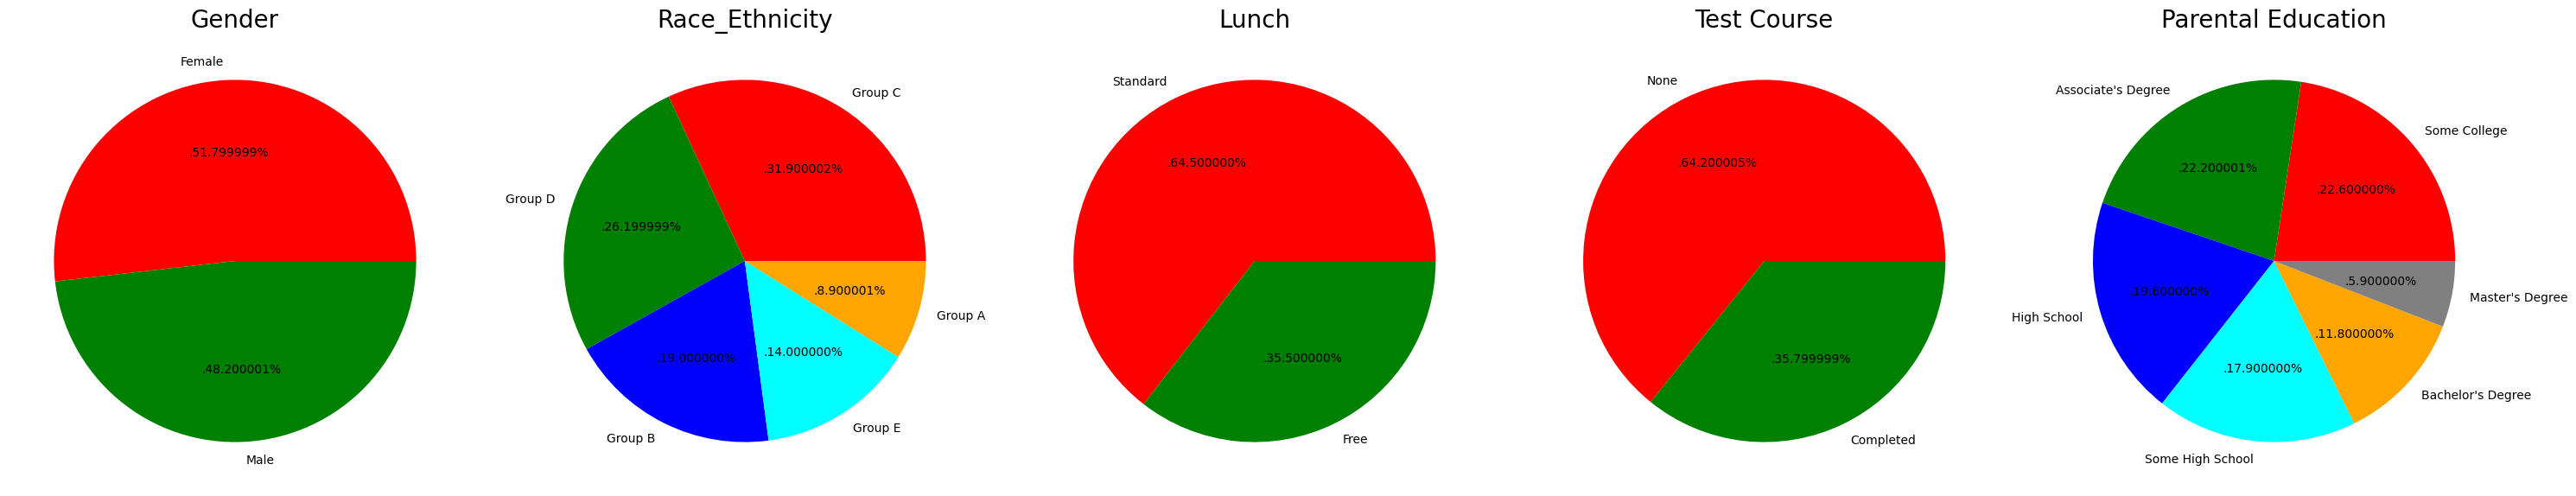

In [107]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### This shows us the number of students from different categories who 
* belonged to male-female (48-51%)
* belonged to different classes of society
* count of what quality of lunch they used to carry
* count of students who actually completed the test preparation course and who didn't 
* count of students with different levels of parental education

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

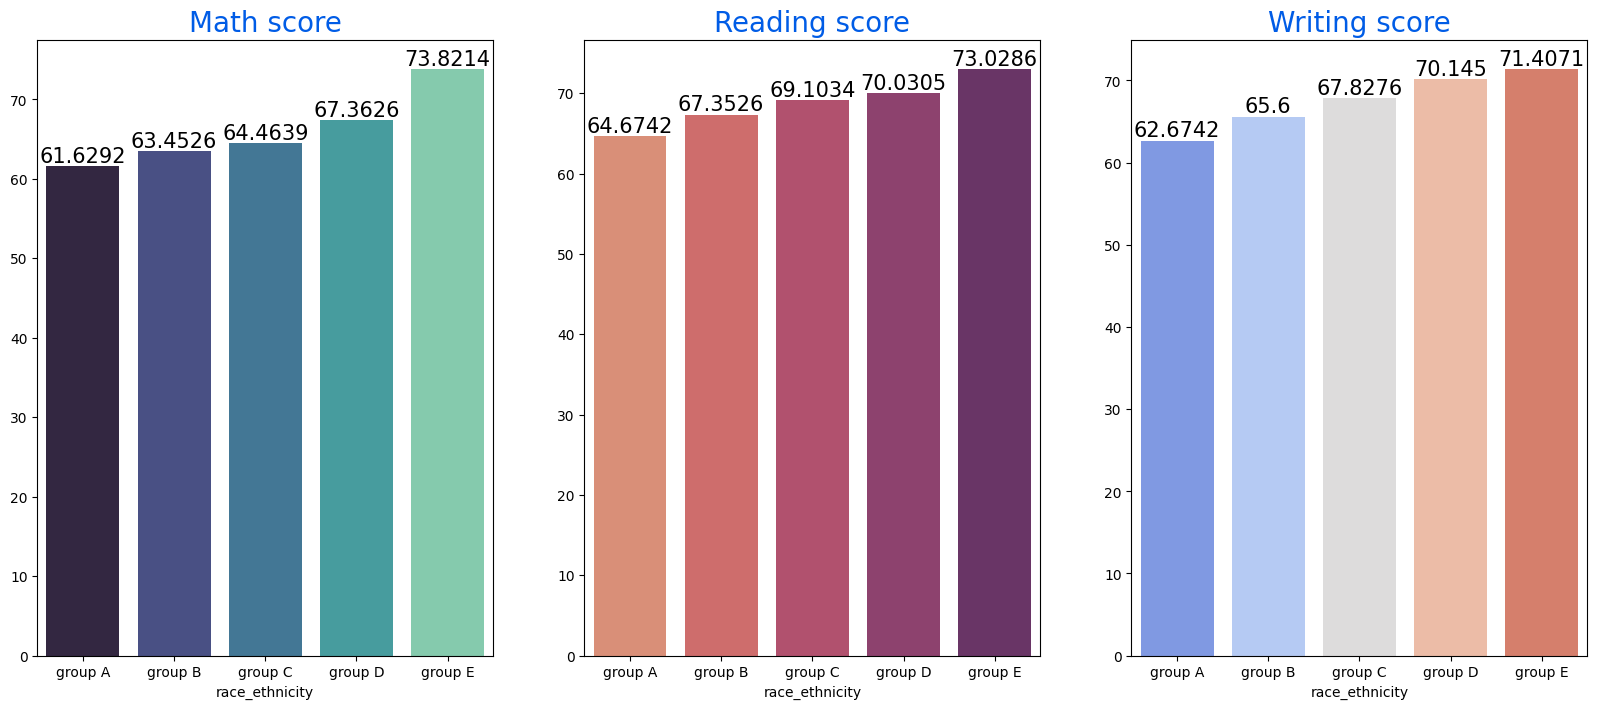

In [116]:
Group_data=df.groupby('race_ethnicity') # tells pandas: “Whenever I ask for a mean, sum, count, etc., compute it separately for each race/ethnicity group.”
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data['math_score'].mean().index,y=Group_data['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['reading_score'].mean().index,y=Group_data['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['writing_score'].mean().index,y=Group_data['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

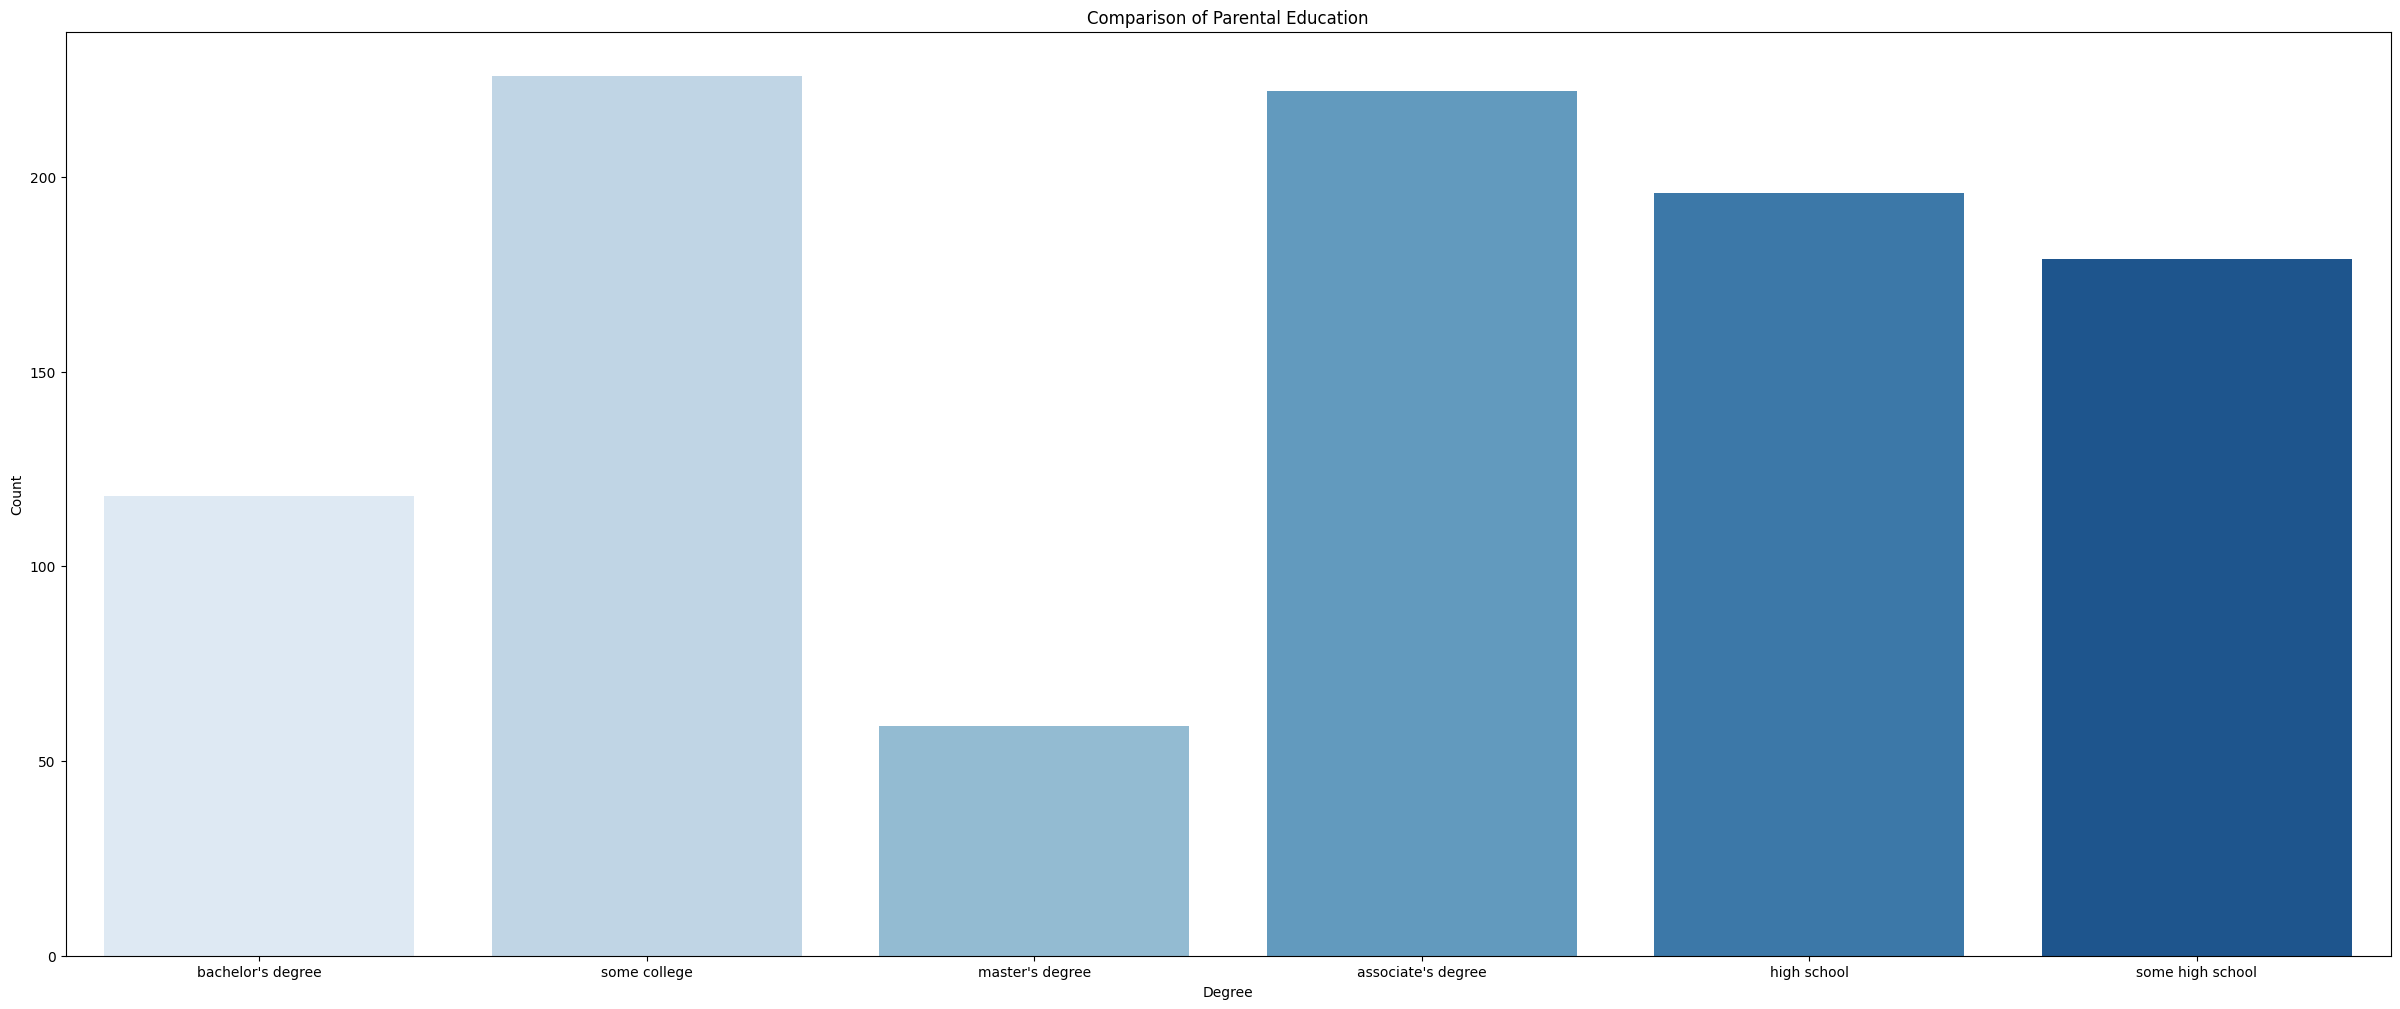

In [118]:
# Univariate Analysis of Parental_education

sns.countplot(data=df, x='parental_level_of_education', palette='Blues')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


Largest number of parents are from some college followed by some associate degree

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

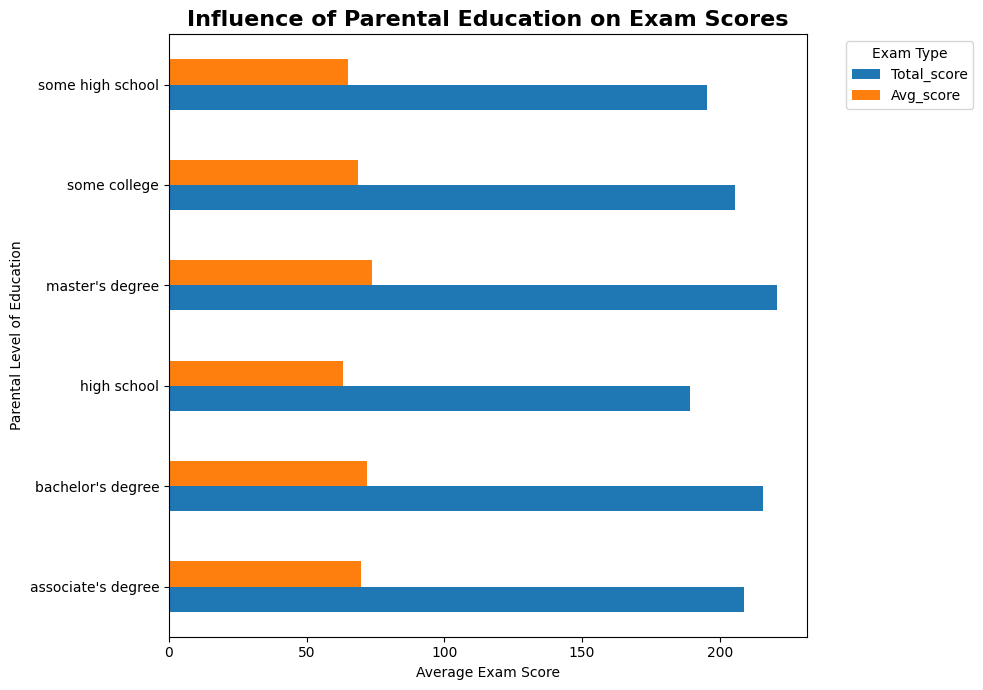

In [124]:
# Group by parental education and calculate mean scores
grouped_scores = df.groupby('parental_level_of_education')[['Total_score','Avg_score']].mean()

# Plot horizontal bar chart
grouped_scores.plot(kind='barh', figsize=(10, 7))

plt.title("Influence of Parental Education on Exam Scores", fontsize=16, fontweight='bold')
plt.xlabel("Average Exam Score")
plt.ylabel("Parental Level of Education")

# Move legend outside the plot for clarity
plt.legend(title="Exam Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Bivariate Analysis of Exam performance wrt to test_preparation_course

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

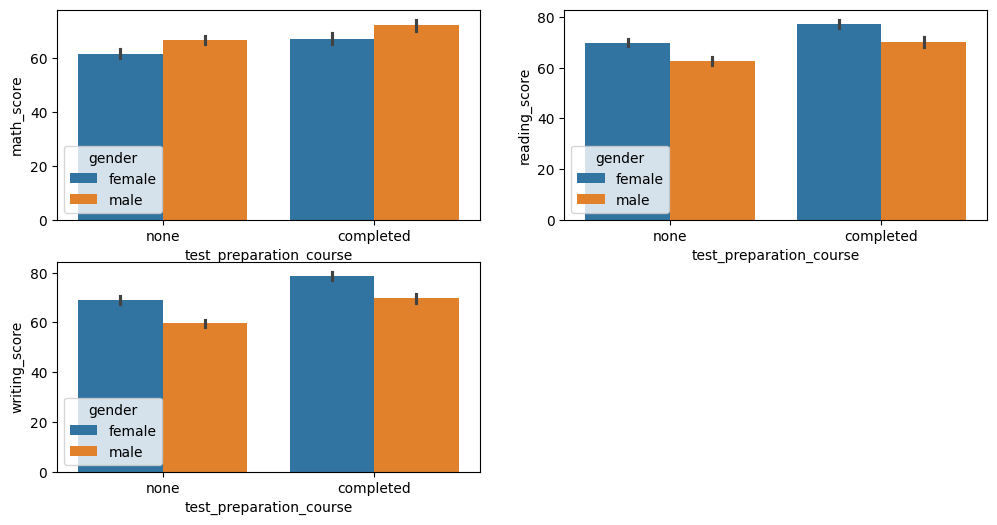

In [130]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'], hue=df['gender'])
plt.subplot(2,2,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'], hue=df['gender'])
plt.subplot(2,2,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'], hue=df['gender'])

* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course
* Boys who completed the course even did better than girls, while girls excelled in the rest 2 domains

#### **CHECKING OUTLIERS**

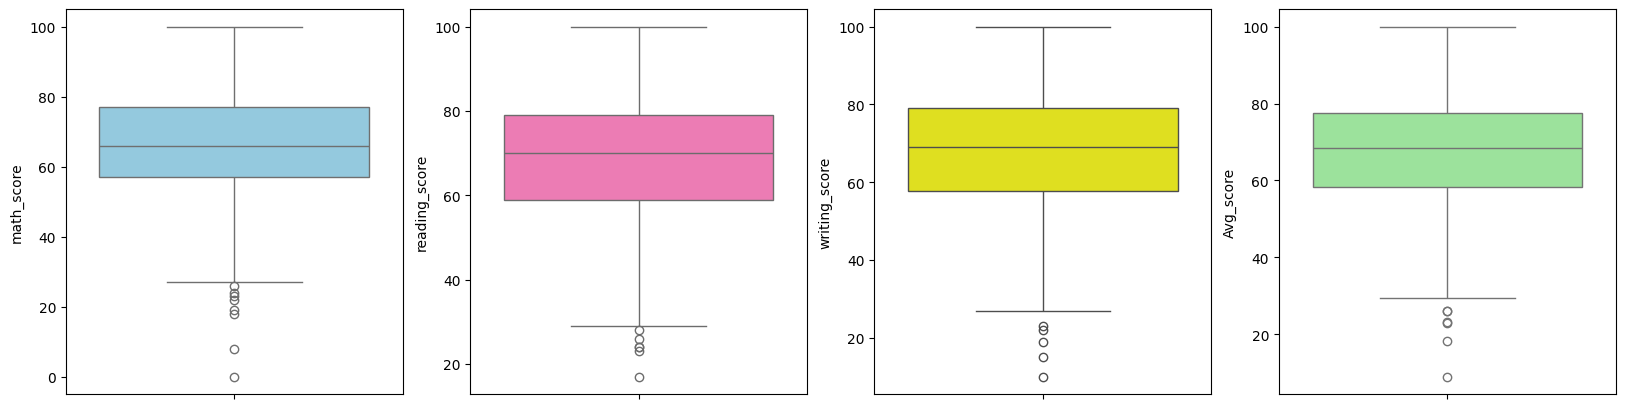

In [133]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Avg_score'],color='lightgreen')
plt.show()

### **CONCLUSIONS**

* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.